Final Portfolio Value: $162848.1926749986
P/L: $-337151.8073250014
-67.43036146500027 %


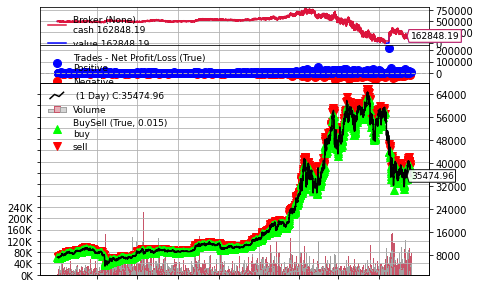

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
from datetime import datetime 
import backtrader as bt
import mine
import pandas as pd
from mine import trend_utils
from pandas_datareader import data
import strategies
import strategy

class MyCSVData(bt.feeds.GenericCSVData):
    params = (
        ('dtformat', '%Y-%m-%d %H:%M:%S'),
        ('datetime', None),
        ('open', 1),
        ('high', 2),
        ('low', 3),
        ('close', 4),
        ('volume', 5),
        
    )

df=pd.read_csv('/root/trading/trading/data/20200101-binance_futures-1h.csv')
df['datetime']=pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df1=df.set_index('datetime', drop=True)
cerebro = bt.Cerebro()
#data = MyCSVData(dataname='/root/trading/trading/data/20200101-ETH_future.csv', fromdate=datetime(2020, 5, 1))
data=bt.feeds.PandasData(dataname=df1, datetime=None)
cerebro.adddata(data)

cerebro.broker.setcash(500000)
cerebro.broker.setcommission(commission=0.0075, mult=20.0)
cerebro.addstrategy(strategies.trend_strategy)
cerebro.run()
#Get final portfolio Value 
portvalue = cerebro.broker.getvalue() 
pnl = portvalue - 500000
#Print out the final result 
print('Final Portfolio Value: ${}'.format(portvalue)) 
print('P/L: ${}'.format(pnl)) 
print((portvalue-500000)/500000*100,'%') 
#Visualize 
figure=cerebro.plot(iplot=False)

In [ ]:
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
import btalib

import pandas as pd 
import os, sys
from datetime import datetime, timedelta

import matplotlib.pylab as plt 
%matplotlib inline
# %matplotlib widget

import openpyxl
from pprint import pprint 

#from cryptoquant import *
from strategy import *
from utils import * 
from graph import * 

import warnings
warnings.filterwarnings('ignore')


from IPython.display import Image
# import openpyxl
# date_format = '%Y-%m-%d %H:%M:%S'
# coinbase_datetime_format = '%Y-%m-%dT%H:%M:%S'
# CQ_DATE_FORMAT = '%Y%m%dT%H%M%S'

In [ ]:
start = '20210501T010000'
end = '20210521T010000'
data = get_price_coinbase_premium_big_df(start, end)
data.to_pickle('../data/20210521.pkl')
data

In [ ]:
try: 
    data = pd.read_pickle('../data/20210521.pkl')
    print('Reading... data')
    print(data)
except FileNotFoundError:
    print('File not found')


In [ ]:
one_day = one_day_from_df(data, '2021-05-18')
one_day

In [ ]:
one_day['price_diff'] = mean_within_window(one_day, 'price_usd_close')

In [ ]:
line_graph(x=one_day.index, y=one_day.price_diff, height=1500, width=2500)
multiline_graph(x=one_day.index, y1=one_day.price_diff, y2=one_day.coinbase_premium_gap, title=['diff', 'gap'], height=1500, width=2500)


In [ ]:
data_feed = PriceSignalData(dataname=data, timeframe=bt.TimeFrame.Minutes, compression=1, name='Binance')

In [ ]:

BINANCE_Commission = 0.04 # percent (based on VIP 0, mmax(maker, taker)) = 0.04 * 0.01 * price 

fund = 100000
cerebro = bt.Cerebro()
cerebro.broker.setcash(fund)

# we don't actually receive cash when we buy perpetual short contracts on Binance
cerebro.broker.set_shortcash(False)

# cerebro.broker.setcommission(commission=0.1, margin=1, mult=10.0, name='Binance')
cerebro.broker.setcommission(
    commission=0.1, 
    commtype = bt.CommInfoBase.COMM_FIXED,
    automargin = 0.05,
    # margin=0.05, 
    mult=1.0, 
    leverage= 20, 
    stocklike = False, 
    name='Binance')

# cerebro.broker.setcommission(commission=0.1, name='Binance')
# cerebro.broker.setcommission(commission=0.1, margin=0, mult=10, name='data')? 


cerebro.adddata(data_feed)
# cerebro.addstrategy(Test)
#cerebro.addstrategy(PrintData)
# cerebro.addstrategy(MACrossOver)
# cerebro.addstrategy(SMACross)
cerebro.addstrategy(RSI)

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name="ta")
cerebro.addanalyzer(bt.analyzers.SQN, _name="sqn")

start_value = cerebro.broker.getvalue()
strategies = cerebro.run()
firstStrat = strategies[0]
end_value = cerebro.broker.getvalue()

pnl = end_value - start_value
print(f'Starting Portfolio Value: {start_value:2f}')
print(f'Final Portfolio Value: {end_value:2f}')
print(f'PnL: {pnl:.2f}')

# print_trade_analysis(firstStrat.analyzers.ta.get_analysis())
# print_sqn(firstStrat.analyzers.sqn.get_analysis())

# cerebro.plot()

In [ ]:
# plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize']=[18, 16]
plt.rcParams['figure.dpi']=200
plt.rcParams['figure.facecolor']='w'
plt.rcParams['figure.edgecolor']='k'

cerebro.plot(iplot=False, volume=False, style='candlestick')
# cerebro.plot(volume=False)

## Test (will be deleted later)

In [ ]:
from datetime import datetime, timedelta

def str_to_datetime(date_str, format):
    '''
    change str date to datetime using format parameter  
    '''
    return(datetime.strptime(date_str, format))

start = '2021-05-01 01:00:00'
test = str_to_datetime(start, '%Y-%m-%d %H:%M:%S').strftime('%Y%m%dT%H%M%S')

test

In [ ]:
import pandas as pd 
import os, sys
from datetime import datetime, timedelta

import matplotlib.pylab as plt 
%matplotlib inline
# %matplotlib widget

import openpyxl
from pprint import pprint 

from cq_utils import *
from strategy import *
from utils import * 
from graph import * 

import warnings
warnings.filterwarnings('ignore')


from IPython.display import Image
start = '2017-05-01 01:00:00'
end = '2021-05-21 01:00:00'
data =stablecoin_supply_ratio(start, end)

In [ ]:
pd.DataFrame(data)

In [ ]:
ssr = stablecoin_supply_ratio(start, end)